In [170]:
#Notebook para Análise e Predições do Consumo de bebidas não alcóolicas no Brasil
#O dataset é importada de maneira automática pelo site da ABIR

#Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

Água Mineral
============

In [171]:
#Recuperação dos dados
df=pd.read_html('https://abir.org.br/o-setor/dados/aguas-minerais/')[0]
df

,Ano,Volume (em 1.000 litros),Variação Anual (em %)
0,2010,6.543.826,NaN
1,2011,7.544.286,"15,3%"
2,2012,8.423.372,"11,7%"
3,2013,11.383.446,"35,1%"
4,2014,12.088.245,"6,2%"
5,2015,12.836.682,"6,2%"
6,2016,12.682.641,"-1,2%"
7,2017,11.997.779,"-5,4%"
8,2018,11.457.878,"-4,5%"


In [172]:
#Adequação dos títulos das colunas afim de evitar erros na execução do algoritmo
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')
df.columns

Index(['Ano', 'Volume_em_1.000_litros', 'Variação_Anual_em_%'], dtype='object')

In [173]:
#Verificação do tipo de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     9 non-null      int64 
 1   Volume_em_1.000_litros  9 non-null      object
 2   Variação_Anual_em_%     8 non-null      object
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [174]:
#Conversão e adequação dos valores
df['Ano'] = df['Ano'].astype(object)
df['Volume_em_1.000_litros'] = df['Volume_em_1.000_litros'].str.replace('.' ,'').astype(float)



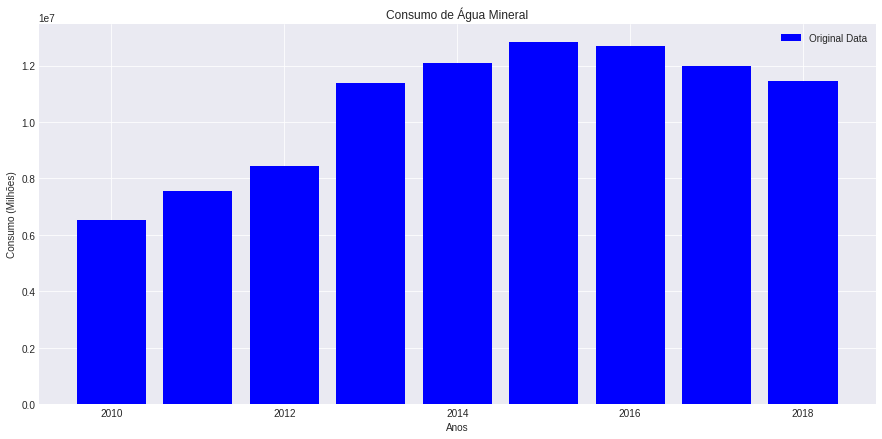

In [175]:
#Plotagem do gráfico do consumo de Água mineral ao longo dos anos
plt.figure(figsize=(15,7))
plt.title('Consumo de Água Mineral')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.bar(df['Ano'],df['Volume_em_1.000_litros'],color='blue',label='Original Data')
plt.legend()
plt.show()

In [176]:
#Importação da biblioteca para predições
from sklearn.svm import SVR

In [177]:
#Criação dos arrays para plotagem
list_ano=[]
list_consumo=[]

for ano in df.Ano:
  list_ano.append([int(ano)])
for valor in df['Volume_em_1.000_litros']:
	list_consumo.append(float(valor))
 


In [178]:
#Cálculo das predições
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(list_ano,list_consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(list_ano,list_consumo)

rbf_svr=SVR(kernel='rbf',C=1200000.0, gamma=0.15)
rbf_svr.fit(list_ano,list_consumo)

SVR(C=1200000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

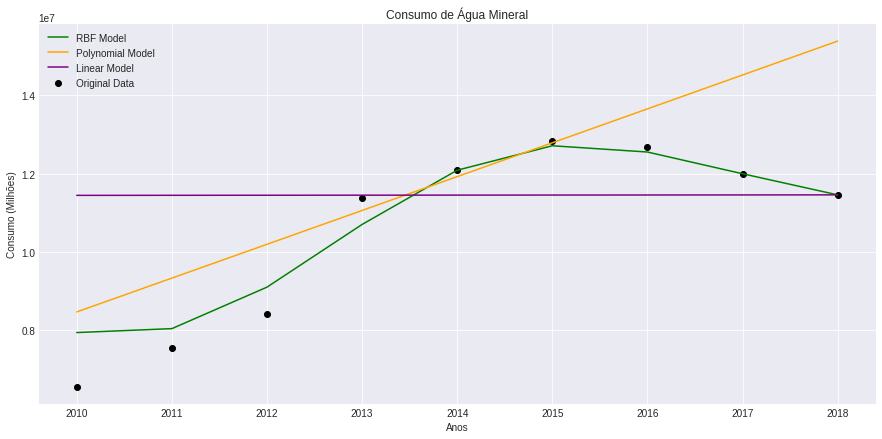

In [179]:
#Plotagem das predições
plt.figure(figsize=(15,7))
plt.title('Consumo de Água Mineral')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')
plt.plot(list_ano, poly_svr.predict(list_ano), color='orange', label='Polynomial Model')
plt.plot(list_ano, lin_svr.predict(list_ano), color='purple', label='Linear Model')
plt.legend()
plt.show()

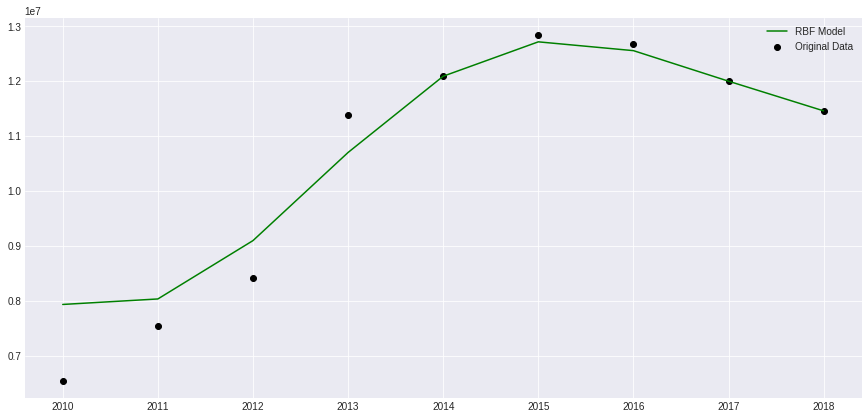

In [180]:
plt.figure(figsize=(15,7))
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')

plt.legend()
plt.show()

In [181]:
ano=2020
the_ano=[[ano]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_ano)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_ano)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(the_ano)[0])


A previsão pelo modelo RBF é:  10814928.272893837
A previsão pelo modelo Linear é:  11461078.0
A previsão pelo modelo Polinomial é:  17126888.474372864



Refrigerantes
============

In [182]:
df=pd.read_html('https://abir.org.br/o-setor/dados/refrigerantes/')[0]
df

,Ano,Volume (em 1.000 litros),Variação Anual (em %)
0,2010,16.961.806,NaN
1,2011,16.783.897,"-1,0%"
2,2012,16.676.159,"-0,6%"
3,2013,16.084.581,"-3,5%"
4,2014,16.341.934,"1,6%"
5,2015,15.350.222,"-6,1%"
6,2016,14.424.793,"-6,0%"
7,2017,12.837.000,-11%
8,2018,12.297.846,"-4,2%"


In [183]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')
df.columns

Index(['Ano', 'Volume_em_1.000_litros', 'Variação_Anual_em_%'], dtype='object')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     9 non-null      int64 
 1   Volume_em_1.000_litros  9 non-null      object
 2   Variação_Anual_em_%     8 non-null      object
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [185]:
df['Ano'] = df['Ano'].astype(object)
df['Volume_em_1.000_litros'] = df['Volume_em_1.000_litros'].str.replace('.' ,'').astype(float)



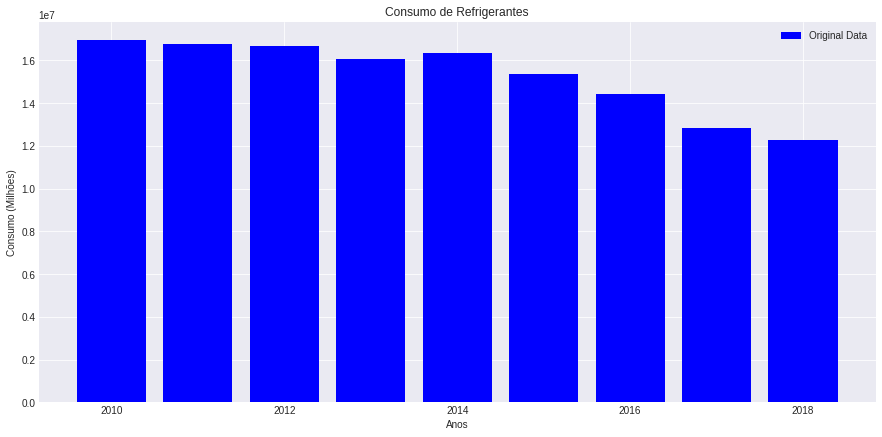

In [186]:
plt.figure(figsize=(15,7))
plt.title('Consumo de Refrigerantes')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.bar(df['Ano'],df['Volume_em_1.000_litros'],color='blue',label='Original Data')
plt.legend()
plt.show()

In [187]:
from sklearn.svm import SVR

In [188]:
list_ano=[]
list_consumo=[]

for ano in df.Ano:
  list_ano.append([int(ano)])
for valor in df['Volume_em_1.000_litros']:
	list_consumo.append(float(valor))
 


In [189]:
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(list_ano,list_consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(list_ano,list_consumo)

rbf_svr=SVR(kernel='rbf',C=1500000.0, gamma=0.15)
rbf_svr.fit(list_ano,list_consumo)

SVR(C=1500000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

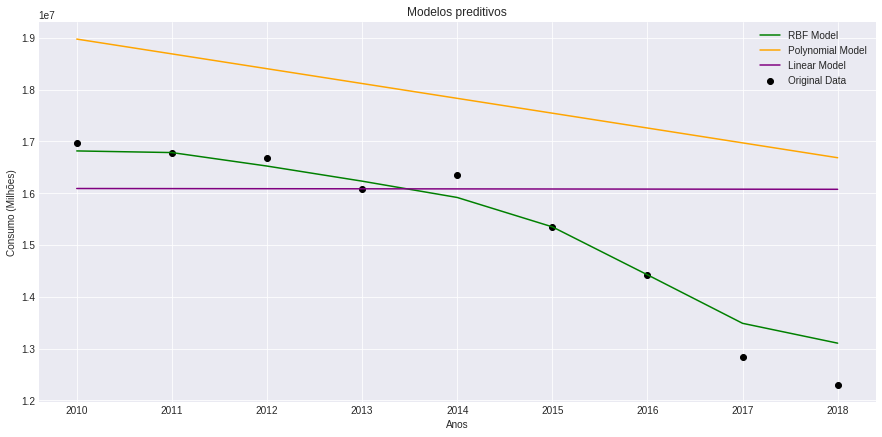

In [190]:
plt.figure(figsize=(15,7))
plt.title('Modelos preditivos')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')
plt.plot(list_ano, poly_svr.predict(list_ano), color='orange', label='Polynomial Model')
plt.plot(list_ano, lin_svr.predict(list_ano), color='purple', label='Linear Model')
plt.legend()
plt.show()

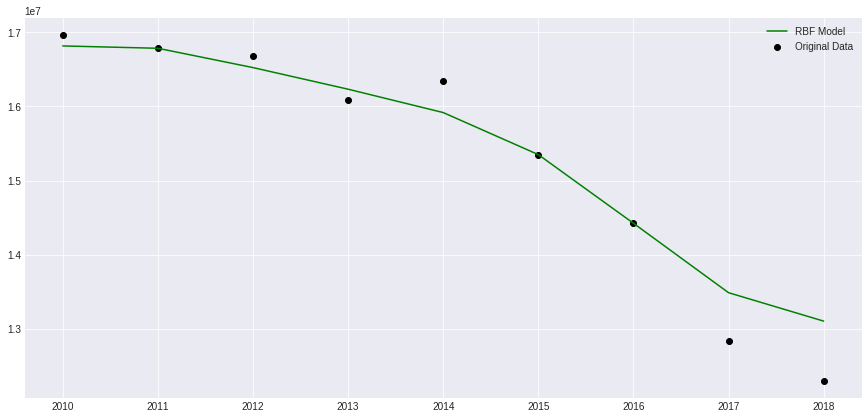

In [191]:
plt.figure(figsize=(15,7))
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')

plt.legend()
plt.show()

In [192]:
ano=2021
the_ano=[[ano]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_ano)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_ano)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(the_ano)[0])



A previsão pelo modelo RBF é:  14783093.059687344
A previsão pelo modelo Linear é:  16069381.0
A previsão pelo modelo Polinomial é:  15823341.856478214


Chás
============

In [193]:
df=pd.read_html('https://abir.org.br/o-setor/dados/chas-rtd-prontos-para-beber/')[0]
df

,Ano,Volume (em 1.000 litros),Variação Anual (em %)
0,2010,97.393,NaN
1,2011,102.089,"4,8%"
2,2012,114.193,"11,9%"
3,2013,125.487,"9,9%"
4,2014,137.785,"9,8%"
5,2015,149.910,"8,8%"
6,2016,148.411,1%
7,2017,162.261,"9,3%"
8,2018,169.785,"4,6%"


In [194]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')
df.columns

Index(['Ano', 'Volume_em_1.000_litros', 'Variação_Anual_em_%'], dtype='object')

In [195]:
df['Ano'] = df['Ano'].astype(object)



In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano                     9 non-null      object 
 1   Volume_em_1.000_litros  9 non-null      float64
 2   Variação_Anual_em_%     8 non-null      object 
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


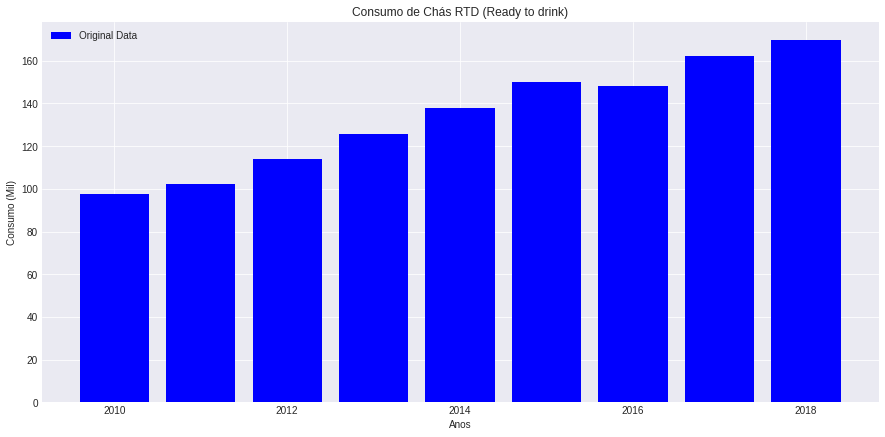

In [197]:
plt.figure(figsize=(15,7))
plt.title('Consumo de Chás RTD (Ready to drink)')
plt.xlabel('Anos')
plt.ylabel('Consumo (Mil)')
plt.bar(df['Ano'],df['Volume_em_1.000_litros'],color='blue',label='Original Data')
plt.legend()
plt.show()

In [198]:
from sklearn.svm import SVR

In [199]:
list_ano=[]
list_consumo=[]

for ano in df.Ano:
  list_ano.append([int(ano)])
for valor in df['Volume_em_1.000_litros']:
	list_consumo.append(float(valor))
 


In [200]:
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(list_ano,list_consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(list_ano,list_consumo)

rbf_svr=SVR(kernel='rbf',C=1000.0, gamma=0.15)
rbf_svr.fit(list_ano,list_consumo)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

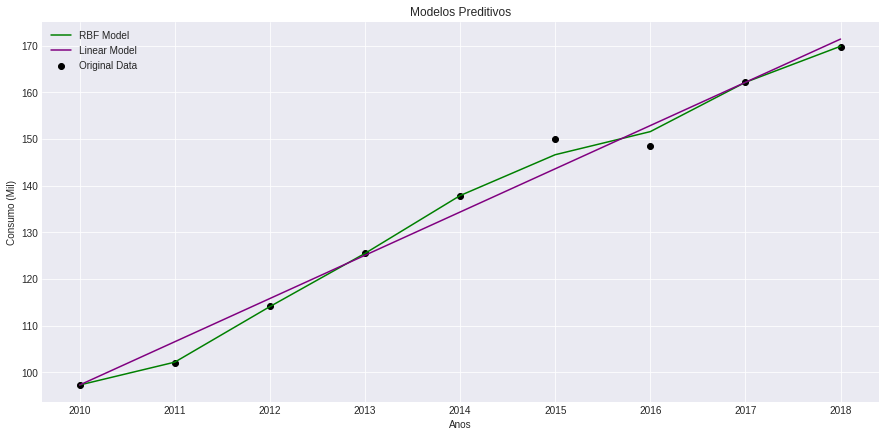

In [201]:
plt.figure(figsize=(15,7))
plt.title('Modelos Preditivos')
plt.xlabel('Anos')
plt.ylabel('Consumo (Mil)')
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')
plt.plot(list_ano, lin_svr.predict(list_ano), color='purple', label='Linear Model')
plt.legend()
plt.show()

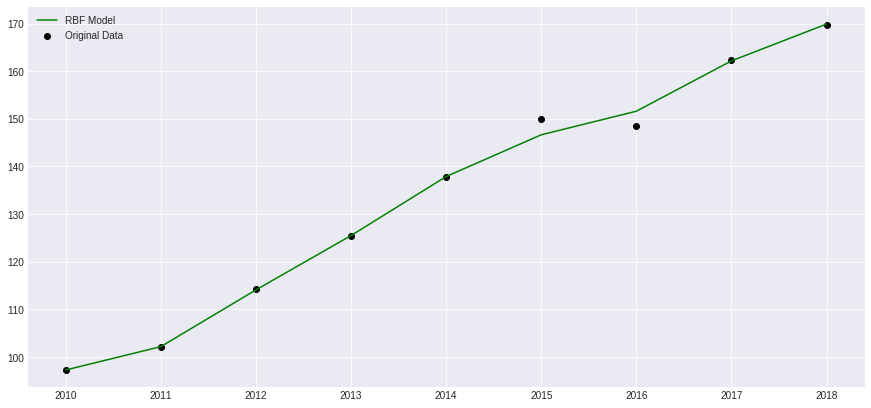

In [202]:
plt.figure(figsize=(15,7))
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')

plt.legend()
plt.show()

In [203]:
ano=2020
the_ano=[[ano]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_ano)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_ano)[0])


A previsão pelo modelo RBF é:  142.4121520019653
A previsão pelo modelo Linear é:  189.96157150475483
A previsão pelo modelo Polinomial é:  -2873249.789170742


Todas as bebidas não Alcoólicas
============

In [204]:
df=pd.read_html('https://abir.org.br/o-setor/dados/x-todas-as-bebidas-nao-alcoolicas/')[0]
df

,Ano,Volume (em 1.000 litros),Variação Anual (em %)
0,2010,30.208.029,NaN
1,2011,31.236.036,"3,4%"
2,2012,32.240.194,"3,2%"
3,2013,35.156.688,"9,0%"
4,2014,36.567.992,"4,0%"
5,2015,35.976.117,"– 1,6%"
6,2016,34.347.157,"-4,5%"
7,2017,32.429.481,"-5,5%"
8,2018,31.032.116,"-4,3%"


In [205]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')
df.columns

Index(['Ano', 'Volume_em_1.000_litros', 'Variação_Anual_em_%'], dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     9 non-null      int64 
 1   Volume_em_1.000_litros  9 non-null      object
 2   Variação_Anual_em_%     8 non-null      object
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [207]:
df['Ano'] = df['Ano'].astype(object)
df['Volume_em_1.000_litros'] = df['Volume_em_1.000_litros'].str.replace('.' ,'').astype(float)



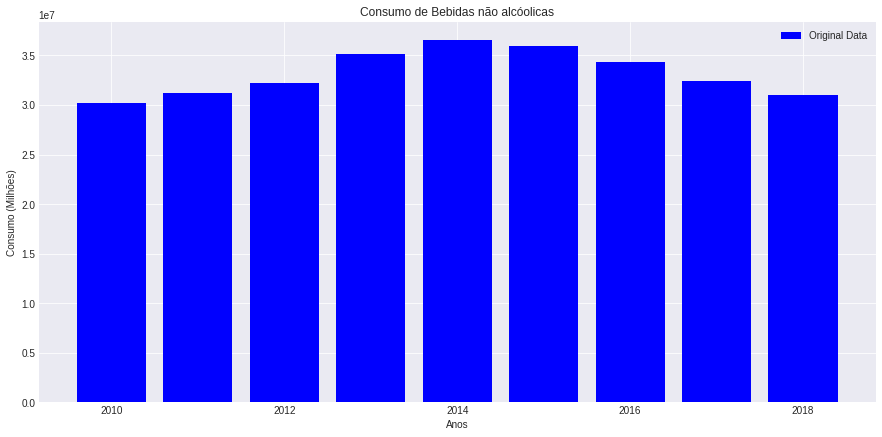

In [208]:
plt.figure(figsize=(15,7))
plt.title('Consumo de Bebidas não alcóolicas')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.bar(df['Ano'],df['Volume_em_1.000_litros'],color='blue',label='Original Data')
plt.legend()
plt.show()

In [209]:
from sklearn.svm import SVR

In [210]:
list_ano=[]
list_consumo=[]

for ano in df.Ano:
  list_ano.append([int(ano)])
for valor in df['Volume_em_1.000_litros']:
	list_consumo.append(float(valor))
 


In [211]:
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(list_ano,list_consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(list_ano,list_consumo)

rbf_svr=SVR(kernel='rbf',C=1500000.0, gamma=0.15)
rbf_svr.fit(list_ano,list_consumo)

SVR(C=1500000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

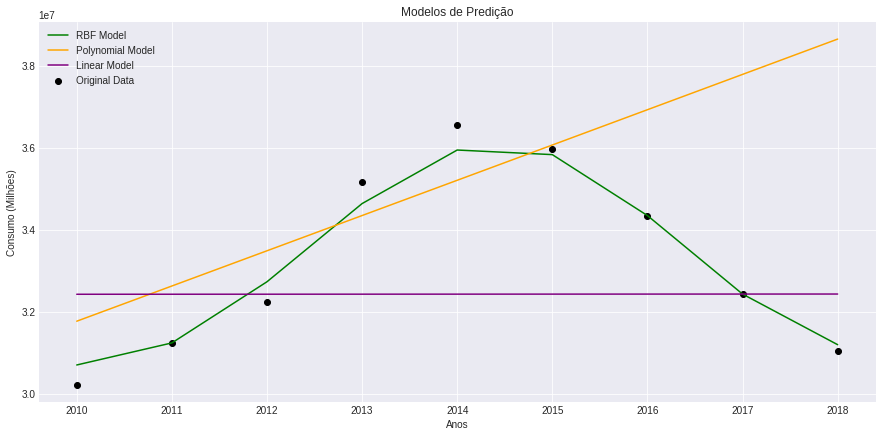

In [212]:
plt.figure(figsize=(15,7))
plt.title('Modelos de Predição')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')
plt.plot(list_ano, poly_svr.predict(list_ano), color='orange', label='Polynomial Model')
plt.plot(list_ano, lin_svr.predict(list_ano), color='purple', label='Linear Model')
plt.legend()
plt.show()

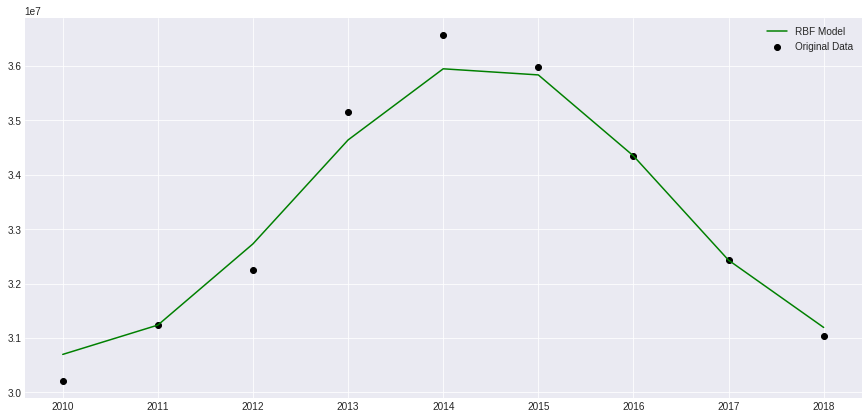

In [213]:
plt.figure(figsize=(15,7))
plt.scatter(list_ano,list_consumo,color='black',label='Original Data')
plt.plot(list_ano, rbf_svr.predict(list_ano), color='green', label='RBF Model')

plt.legend()
plt.show()

In [214]:
ano=2021
the_ano=[[ano]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_ano)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_ano)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(the_ano)[0])

A previsão pelo modelo RBF é:  32056165.71483691
A previsão pelo modelo Linear é:  32432281.0
A previsão pelo modelo Polinomial é:  41249582.11029911


Gráficos das Previsões 
=======

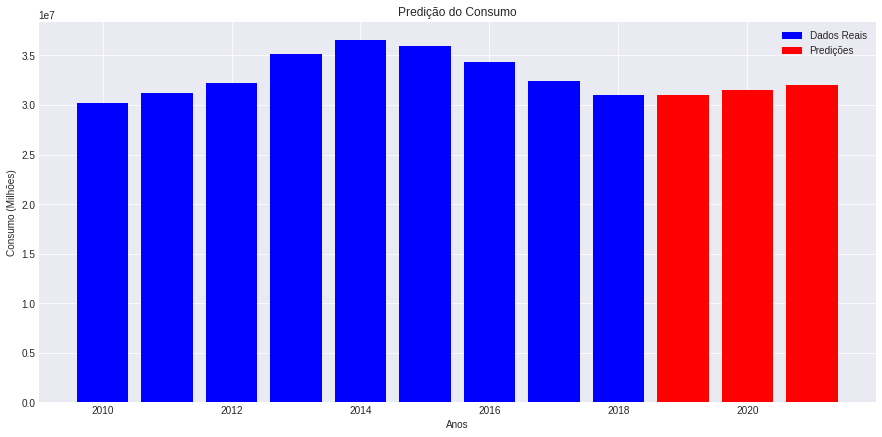

In [215]:
label=[2019,2020,2021]
valores=[31031759,31520552,32056165]
plt.figure(figsize=(15,7))
plt.title('Predição do Consumo')
plt.xlabel('Anos')
plt.ylabel('Consumo (Milhões)')
plt.bar(df['Ano'],df['Volume_em_1.000_litros'],color='blue',label='Dados Reais')
plt.bar(label,valores,color='red',label='Predições')
plt.legend()
plt.show()